# Exercise 0: Getting Started!

In [2]:
# Load packages we need
import sys
import os

import numpy as np
import sklearn

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})

# Let's check our software versions
print('### Python version: ' + sys.version)
print('### Numpy version: ' + np.__version__)
print('### Scikit-learn version: ' + sklearn.__version__)
print('------------')


# load our packages / code
sys.path.insert(1, '../common/')
import utils
import plots

### Python version: 3.8.12 (default, Oct 12 2021, 06:23:56) 
[Clang 10.0.0 ]
### Numpy version: 1.19.5
### Scikit-learn version: 1.0.1
------------


In [3]:
# global parameters to control behavior of the pre-processing, ML, analysis, etc.

seed = 42 # deterministic seed

np.random.seed(seed) 

# 80% training, 20% testing
train_prop = 0.8
test_prop = 1.0 - train_prop

### Loading data

In [4]:
from sklearn.datasets import load_iris

# For this exercise, we'll load a dataset directly from scikit-learn
iris = load_iris()
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

all_x = iris['data']
all_y = iris['target']

In [8]:
# what are the classes and features?
# 'target_names' and 'feature_names' fields in 'iris'


classes= iris['target_names']
features = iris['feature_names']

print('Classes: {}'.format(classes))
print('Features: {}'.format(features))

Classes: ['setosa' 'versicolor' 'virginica']
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# let's check the shape to know what we are getting
print(all_x.shape, all_y.shape)

(150, 4) (150,)


In [11]:
# We'll use only two classes ('versicolor', 'virginica')
class1_idx = 1
class2_idx = 2

sel_classes = [classes[class1_idx], classes[class2_idx]]

versicolor_label = 1
virginica_label = 2

# keep only examples of these two classes
sel_idx_1 = np.where(all_y == versicolor_label)[0]
sel_idx_2 = np.where(all_y == virginica_label)[0]

sel_idx = np.r_[sel_idx_1, sel_idx_2]
# Note: we could use np.hstack((sel_idx_1, sel_idx_2)) instead

sel_x = all_x[sel_idx,:]
sel_y = all_y[sel_idx]

In [12]:
sel_x.shape,sel_y.shape,sel_y

((100, 4),
 (100,),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]))

In [13]:
# and grab only the last two features (i.e., 'petal length' (idx 2), 'petal_width' (idx 3))

feature1_idx = 2
feature2_idx = 3


proc_x = sel_x[:, [feature1_idx, feature2_idx]]
proc_y = sel_y

In [14]:
# recheck the shapes
print(proc_x.shape, proc_y.shape)

(100, 2) (100,)


In [15]:
# train - test split
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(proc_x, proc_y, train_size=train_prop, test_size=test_prop, 
                                                        random_state=seed)# set the random state to our seed for reproducibility 

### let's look at the data

In [16]:
# first check the shapes of train
train_x.shape,train_y.shape, test_x.shape,test_y.shape


((80, 2), (80,), (20, 2), (20,))

In [17]:
# what does the (training) data look like?
train_x[0:5,:]

array([[6.6, 2.1],
       [4.8, 1.8],
       [4.8, 1.4],
       [4. , 1.2],
       [5. , 1.5]])

In [18]:
# what does the data look like?
train_y[0:10]

array([2, 2, 1, 1, 2, 1, 1, 2, 1, 2])

### let's train our first model

In [19]:
from sklearn.svm import SVC
## ref: https://scikit-learn.org/stable/modules/svm.html

model = SVC(kernel='linear', random_state=seed).fit(train_x, train_y)

In [24]:
model,model.coef_,model.intercept_

(SVC(kernel='linear', random_state=42),
 array([[1.99999545, 1.99999537]]),
 array([-12.99997028]))

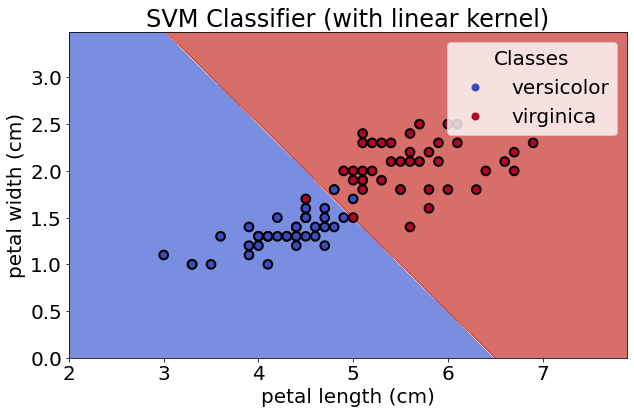

In [21]:
# plot to show classifier's decision boundary and training examples
title = 'SVM Classifier (with linear kernel)'

# we use matplotlib for this
fig, ax = plt.subplots(figsize=(10,6)) # create a new figure

# grab the training data features
X0, X1 = train_x[:, 0], train_x[:, 1]

# make a grid so we can plot the decision regions and boundaries (see plots.py for implementation of countours)
xx, yy = plots.make_meshgrid(X0, X1, h=0.01)
plots.contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.75)

# now plot the training data points in a scatter plot with color according to the labels (train_y)
scatter = ax.scatter(X0, X1, c=train_y, cmap=plt.cm.coolwarm, s=75, linewidth=2, edgecolors='k')

# set limits, labels, title
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.set_xlabel(features[feature1_idx])
ax.set_ylabel(features[feature2_idx])
ax.set_title(title)

# legend
handles, labels = scatter.legend_elements()
ax.legend(handles, sel_classes, loc="upper right", title="Classes")

plt.show()

## Now, let's evaluate our model

In [25]:
# make predictions on test set
pred_y = model.predict(test_x)

In [26]:
pred_y

array([2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1])

In [27]:


# are those prediction correct?
from sklearn import metrics

acc_score = metrics.accuracy_score(test_y,pred_y)

# use scikit-learn to compute accuracy for us (metrics.accuracy_score) on the test data

print('Model accuracy: {:.2f}%'.format(acc_score*100))

Model accuracy: 95.00%


In [28]:
np.mean(test_y == pred_y)

0.95

### What about the training data?

In [29]:
# make predictions on *training* set
pred_y = model.predict(train_x)

acc_score = metrics.accuracy_score(train_y, pred_y)
print('Training accuracy: {:.2f}%'.format(acc_score*100))

Training accuracy: 96.25%


## Q: Is the model overfitted?